# simple time series 

Time series data is an important source for information and strategy used in various businesses. From a conventional finance industry to education industry, they play a major role in understanding a lot of details on specific factors with respect to time.

I will be using python in *jupyter notebook*. and i will be using Pandas, python has libraries that are specific to handling time series object .

In [55]:
# we are importing pandas, we are using pandas to load csv file 
# we are importing matplotlib, we are using matplotlib to plot graph 

import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Loading csv file with pandas

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',header=0, index_col=0)
print(df.head())
print('\n Data Types:')
print (df.dtypes) 

                value
date                 
1991-07-01 3.52659100
1991-08-01 3.18089100
1991-09-01 3.25222100
1991-10-01 3.61100300
1991-11-01 3.56586900

 Data Types:
value    float64
dtype: object


<hr/>


 ## Test for Stationarity
 
 A dataset is stationary if its statistical properties like mean, variance, and autocorrelation do not change over time.
 
we are using visualization to check for Stationary the are two common methods to check for stationarity 
-visualization - the Augmented Dickey - Fuller(ADF)

In [56]:
y=df['value']

# Visualization Approach

def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

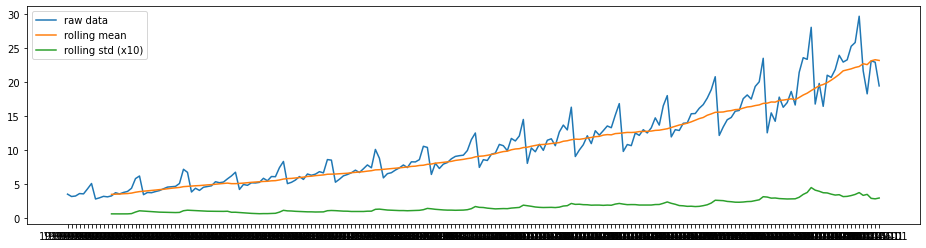

In [57]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [58]:
from statsmodels.tsa.stattools import adfuller

# ADF Approach

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [59]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 3.145
P-value = 1.000
Critical values :
	1%: -3.465620397124192 - The data is not stationary with 99% confidence
	5%: -2.8770397560752436 - The data is not stationary with 95% confidence
	10%: -2.5750324547306476 - The data is not stationary with 90% confidence


<span style="color: #428df5">both the visualization and ADF test, we can tell that our sample data is non-stationary. </span>



<hr/>

# Make Data Stationary


 > Is the de-trended data stationary ?
Test statistic = -3.893
P-value = 0.002
Critical values :
	1%: -3.467631519151906 - The data is  stationary with 99% confidence
	5%: -2.8779183721695567 - The data is  stationary with 95% confidence
	10%: -2.575501353364474 - The data is  stationary with 90% confidence


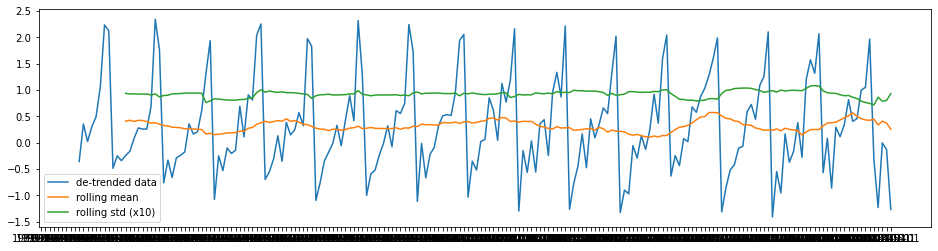

In [60]:
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

<span style='color:#428df5'>you can see here the data are stationary from both visualization and ADF approach

# Conclusion



A time series analysis focuses on a series of data points ordered in time. This is one of the most widely used data science analyses and is applied in a variety of industries. This approach can play a huge role in helping companies understand and forecast data patterns and other phenomena, and the results can drive better business decisions. ex:If you’re in the financial industry, a time series analysis can allow you to forecast stock prices for more effective investment decisions